In [1]:
# HPC
import numpy as np
import xarray as xr
from scipy.interpolate import interp1d

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

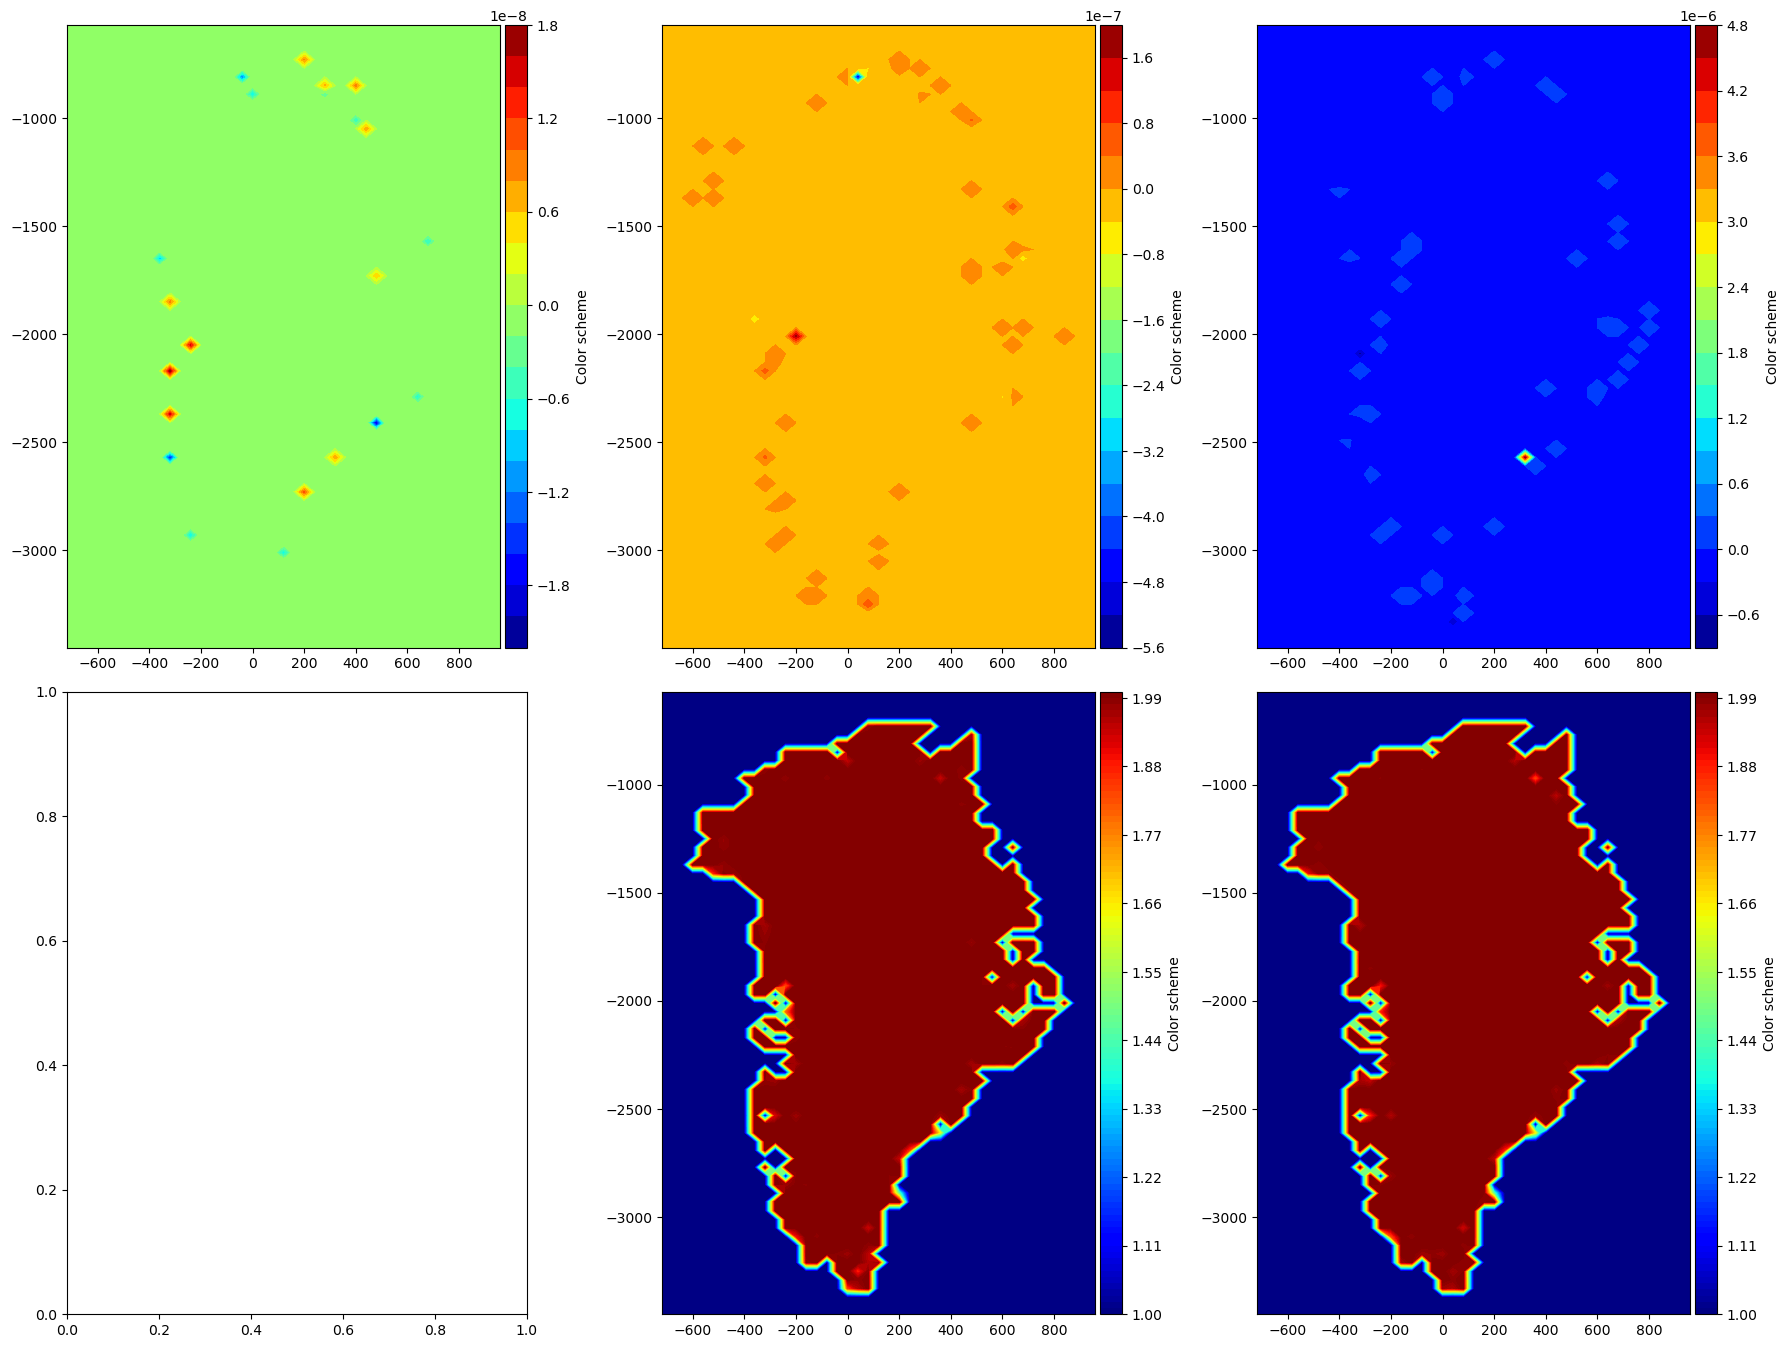

In [2]:
modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/'
dataPath = '/scratch2/shreyas/GrIS_paleo_data/'

ds_surfvel_data_40km = xr.open_dataset(dataPath + 'surfvel_data_40kms.nc')
ds_surfvel_model_40km = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_nudged_CT4_BH0_m21ka_pkp/grl40_bm5_paleo17a_nudged_CT4_BH0_m21ka_pkp0007.nc')

vs_orig_data = ds_surfvel_data_40km["vs_orig"].data
vs_data = ds_surfvel_data_40km["vs"].data
vx_data = ds_surfvel_data_40km["vx"].data
vy_data = ds_surfvel_data_40km["vy"].data
vx_uncert_data = ds_surfvel_data_40km['vx_uncert'].data
vy_uncert_data = ds_surfvel_data_40km['vy_uncert'].data
vs_data_manual = ds_surfvel_data_40km["vs_manual"].data
vx_data_manual = ds_surfvel_data_40km["vx_manual"].data
vy_data_manual = ds_surfvel_data_40km["vy_manual"].data
vx_uncert_data_manual = ds_surfvel_data_40km['vx_uncert_manual'].data
vy_uncert_data_manual = ds_surfvel_data_40km['vy_uncert_manual'].data

vs_model = (ds_surfvel_model_40km['vx_s_g'].data**2 + ds_surfvel_model_40km['vy_s_g'].data**2)**0.5
vx_model = ds_surfvel_model_40km['vx_s_g'].data
vy_model = ds_surfvel_model_40km['vy_s_g'].data

n_rows, n_cols = 2, 3
aspect_ratio = len(ds_surfvel_model_40km['x'])/len(ds_surfvel_model_40km['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.5)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_data/vs_data_manual-1,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 0])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vx_data/vx_data_manual-1,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vy_data/vy_data_manual-1,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 2])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vx_uncert_data/vx_uncert_data_manual,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vy_uncert_data/vy_uncert_data_manual,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[1, 2])
plt.tight_layout()

/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/sr

(39097480.62226422,
 8775595.799301974,
 47873076.421566196,
 155877938.26076624,
 34954263.74263258,
 190832202.00339884)

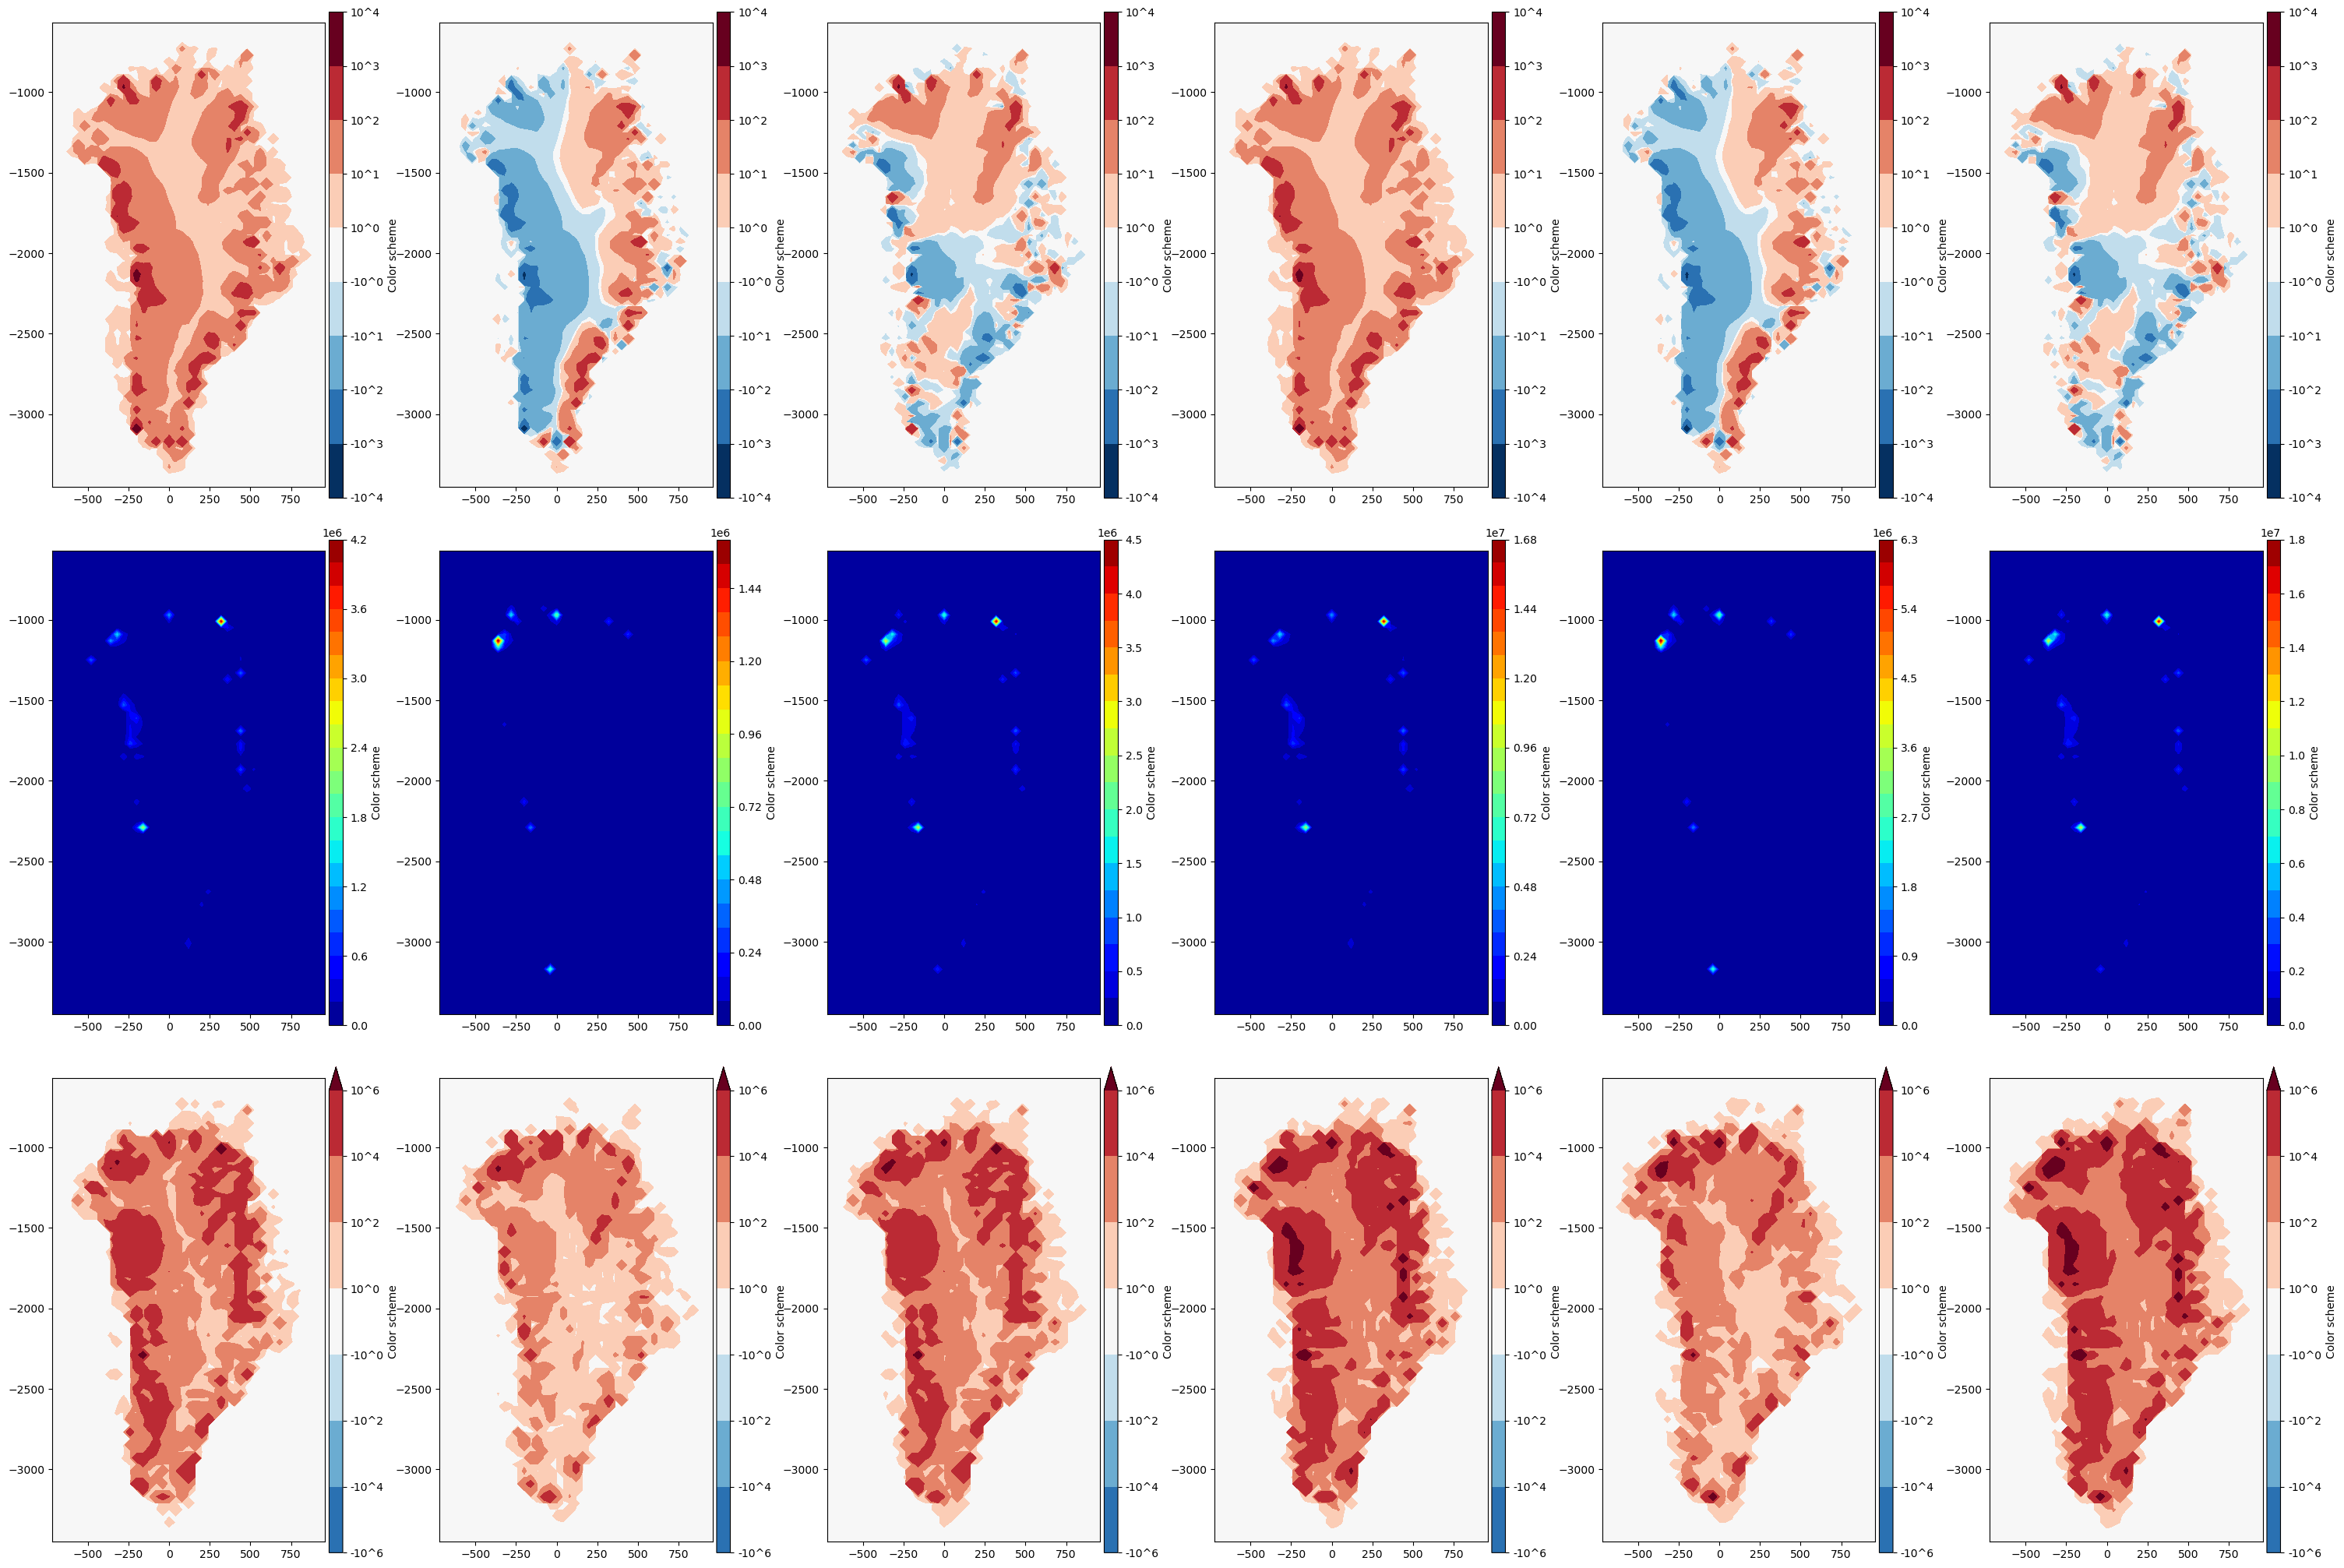

In [3]:
costs_x = 0.5*(vx_data - vx_model)**2 / vx_uncert_data**2 * (vx_data > -1.e8) * (vx_uncert_data > -1.e8)
costs_y = 0.5*(vy_data - vy_model)**2 / vy_uncert_data**2 * (vy_data > -1.e8) * (vy_uncert_data > -1.e8)

costs_x_manual = 0.5*(vx_data_manual - vx_model)**2 / vx_uncert_data_manual**2 * (vx_data_manual > -1.e8) * (vx_uncert_data_manual > -1.e8)
costs_y_manual = 0.5*(vy_data_manual - vy_model)**2 / vy_uncert_data_manual**2 * (vy_data_manual > -1.e8) * (vy_uncert_data_manual > -1.e8)

n_rows, n_cols = 3, 6
aspect_ratio = len(ds_surfvel_model_40km['x'])/len(ds_surfvel_model_40km['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.5)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)
    
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vs_data * (vs_data > -1.e8),
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[0, 0])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vx_data * (vx_data > -1.e8),
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[0, 1])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vy_data * (vy_data > -1.e8),
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[0, 2])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vs_data_manual * (vs_data_manual > -1.e8),
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[0, 3])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vx_data_manual * (vx_data_manual > -1.e8),
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[0, 4])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vy_data_manual * (vy_data_manual > -1.e8),
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[0, 5])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 0])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_y,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x + costs_y,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 2])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x_manual,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 3])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_y_manual,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 4])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x_manual + costs_y_manual,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 5])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[2, 0])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_y,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[2, 1])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x + costs_y,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[2, 2])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x_manual,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[2, 3])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_y_manual,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[2, 4])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x_manual + costs_y_manual,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[2, 5])

plt.tight_layout()

np.sum(costs_x), np.sum(costs_y), np.sum(costs_x) + np.sum(costs_y), np.sum(costs_x_manual), np.sum(costs_y_manual), np.sum(costs_x_manual) + np.sum(costs_y_manual)

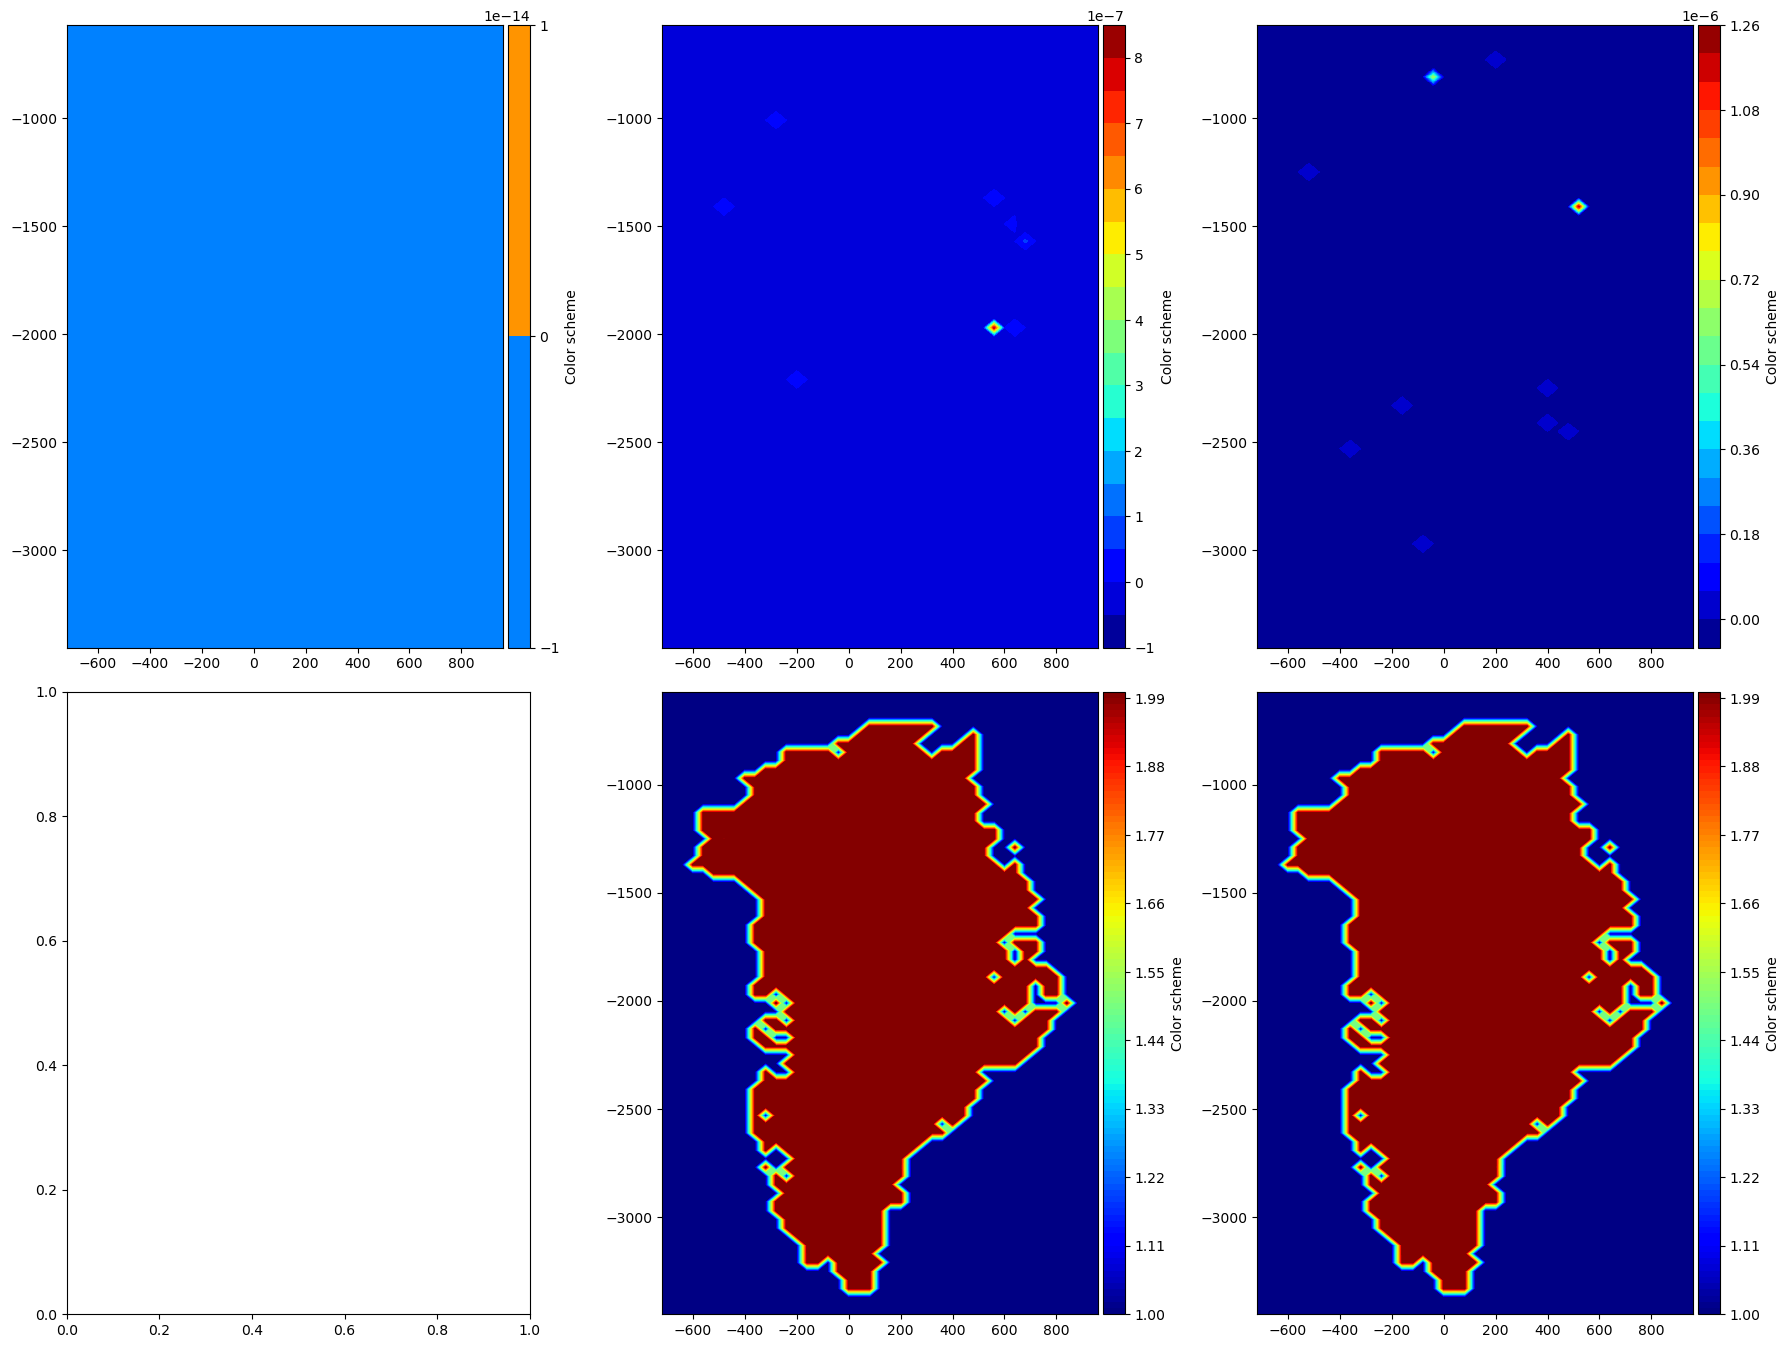

In [4]:
modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/'
dataPath = '/scratch2/shreyas/GrIS_paleo_data/'

ds_surfvel_data_40km = xr.open_dataset(dataPath + 'surfvel_data_40kms_gs_before.nc')
ds_surfvel_model_40km = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_nudged_CT4_BH0_m21ka_pkp/grl40_bm5_paleo17a_nudged_CT4_BH0_m21ka_pkp0007.nc')

vs_orig_data = ds_surfvel_data_40km["vs_orig"].data
vs_data = ds_surfvel_data_40km["vs"].data
vx_data = ds_surfvel_data_40km["vx"].data
vy_data = ds_surfvel_data_40km["vy"].data
vx_uncert_data = ds_surfvel_data_40km['vx_uncert'].data
vy_uncert_data = ds_surfvel_data_40km['vy_uncert'].data
vs_data_manual = ds_surfvel_data_40km["vs_manual"].data
vx_data_manual = ds_surfvel_data_40km["vx_manual"].data
vy_data_manual = ds_surfvel_data_40km["vy_manual"].data
vx_uncert_data_manual = ds_surfvel_data_40km['vx_uncert_manual'].data
vy_uncert_data_manual = ds_surfvel_data_40km['vy_uncert_manual'].data

vs_model = (ds_surfvel_model_40km['vx_s_g'].data**2 + ds_surfvel_model_40km['vy_s_g'].data**2)**0.5
vx_model = ds_surfvel_model_40km['vx_s_g'].data
vy_model = ds_surfvel_model_40km['vy_s_g'].data

n_rows, n_cols = 2, 3
aspect_ratio = len(ds_surfvel_model_40km['x'])/len(ds_surfvel_model_40km['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.5)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_data/vs_data_manual-1,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 0])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vx_data/vx_data_manual-1,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vy_data/vy_data_manual-1,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 2])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vx_uncert_data/vx_uncert_data_manual,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vy_uncert_data/vy_uncert_data_manual,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[1, 2])
plt.tight_layout()

/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/sr

(34526612.1378561,
 7108439.781730701,
 41635051.91958681,
 138088817.37228182,
 28424643.240331963,
 166513460.6126138)

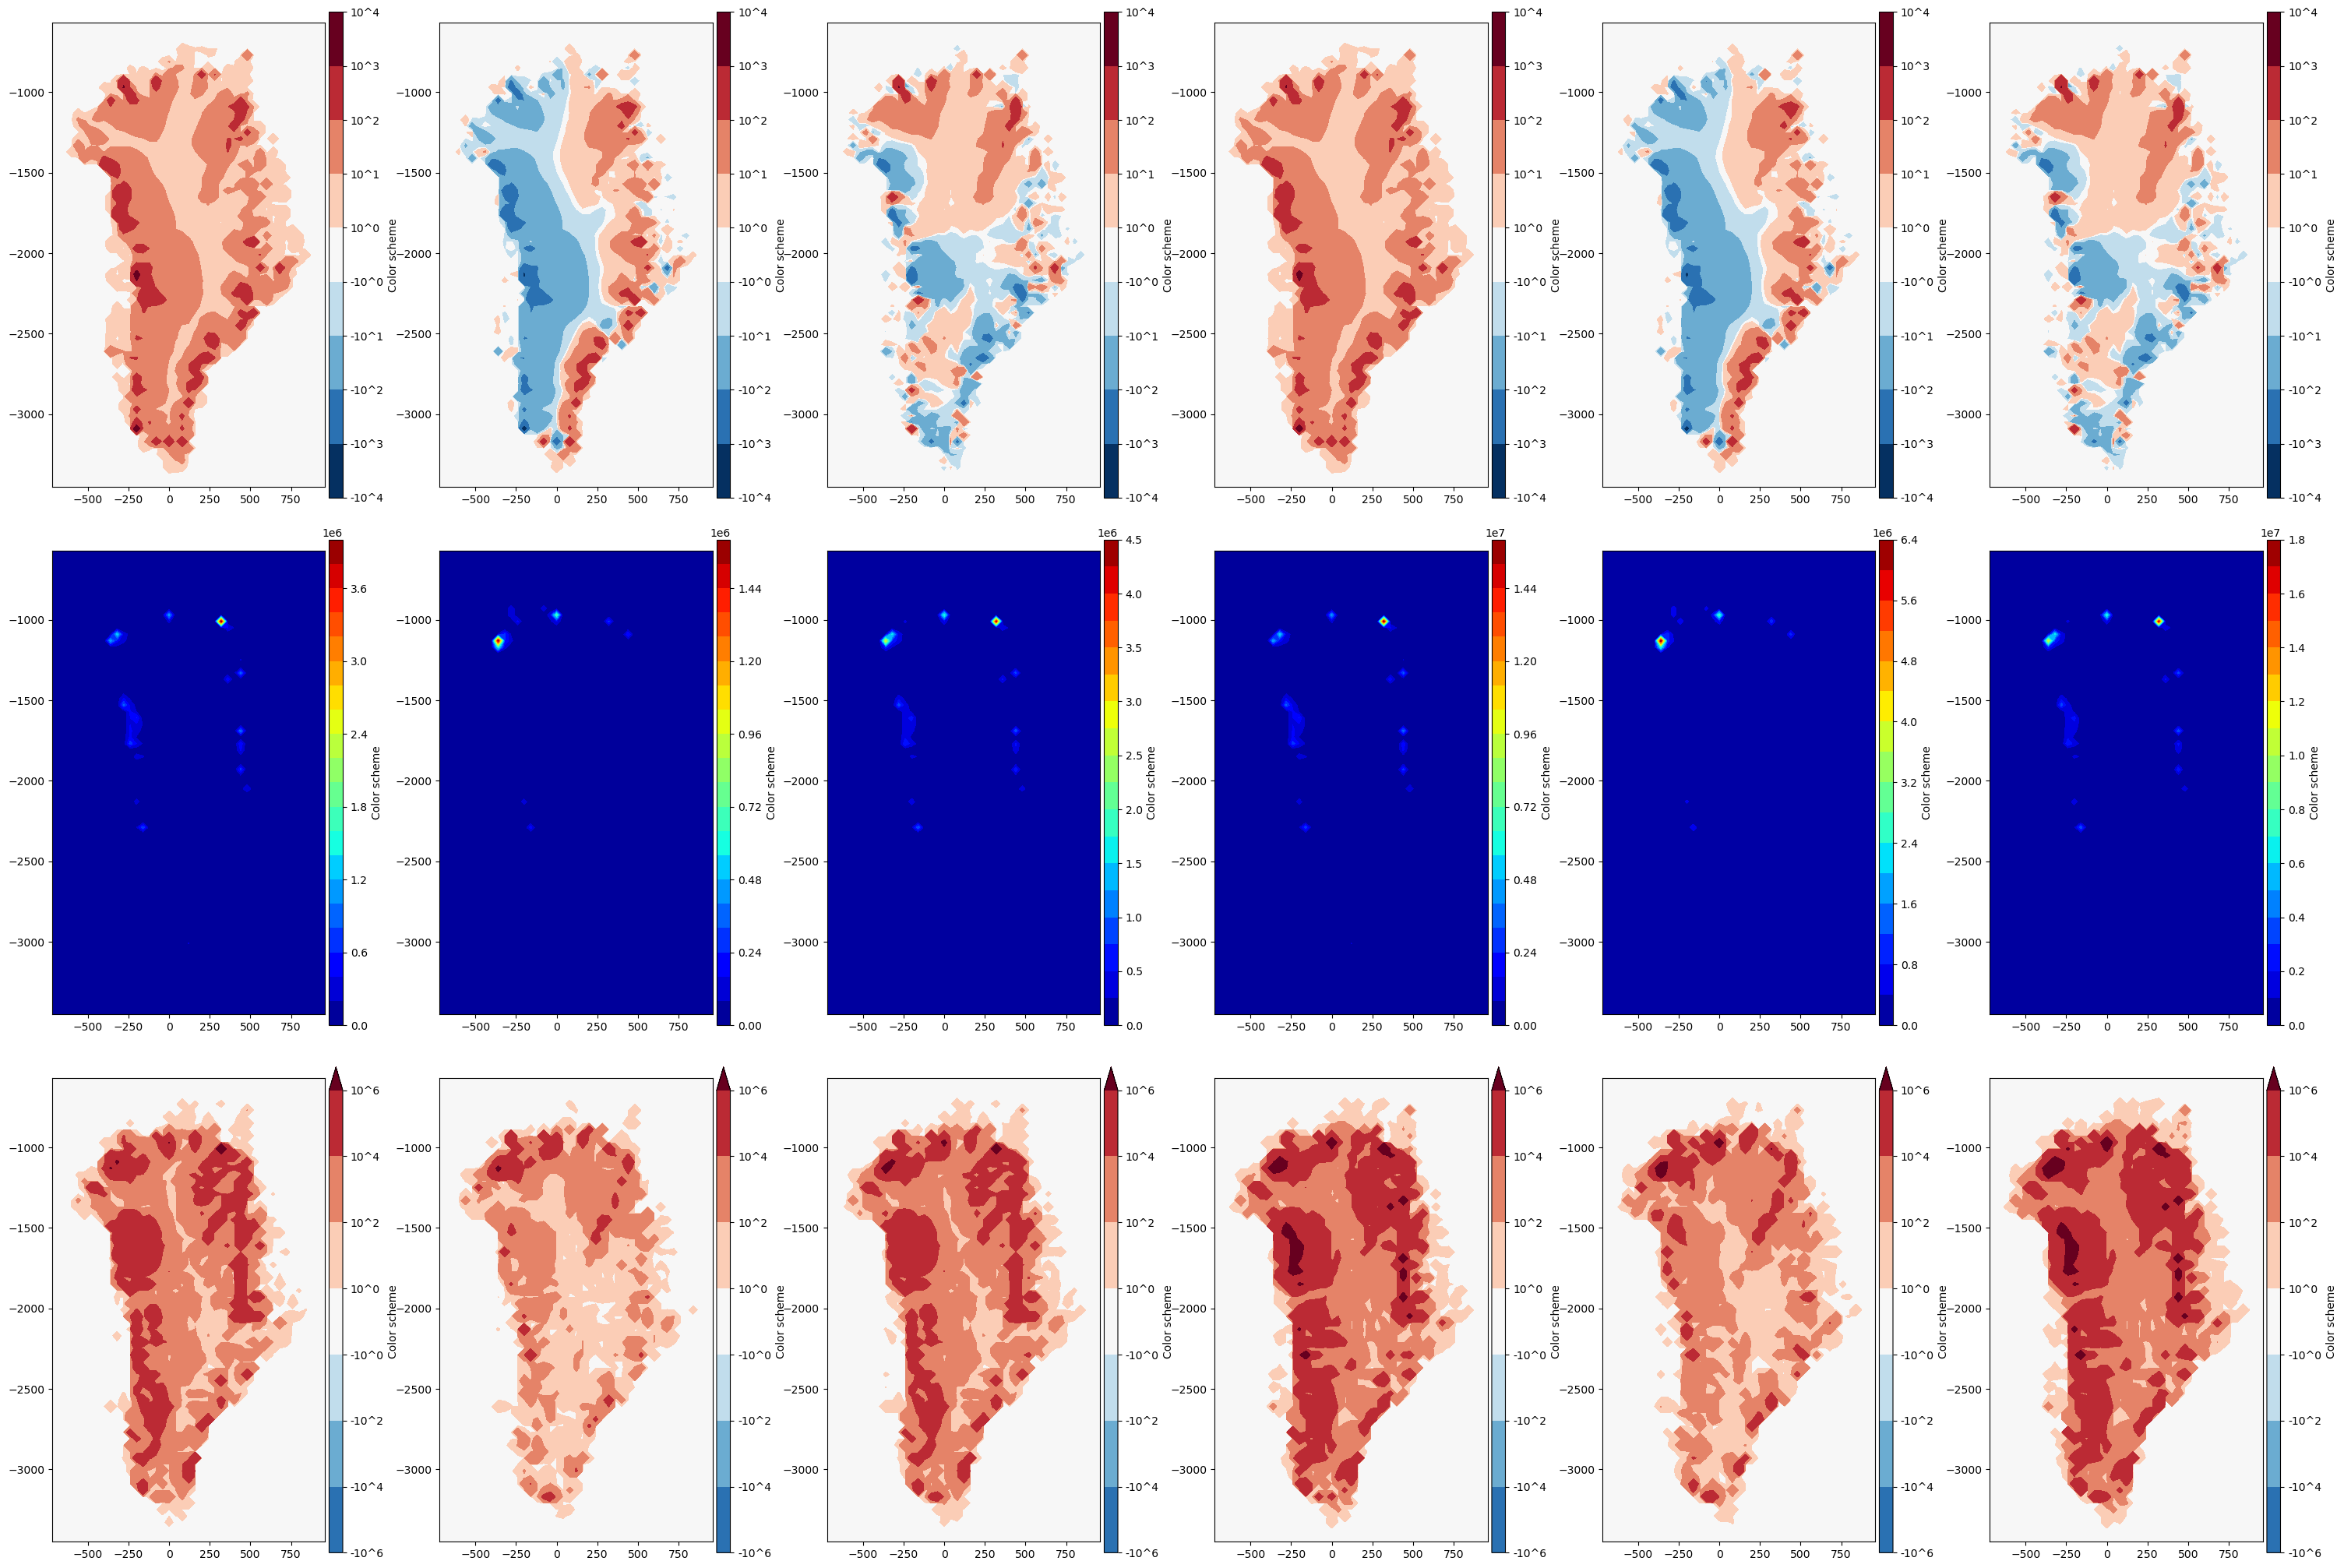

In [5]:
costs_x = 0.5*(vx_data - vx_model)**2 / vx_uncert_data**2 * (vx_data > -1.e8) * (vx_uncert_data > -1.e8)
costs_y = 0.5*(vy_data - vy_model)**2 / vy_uncert_data**2 * (vy_data > -1.e8) * (vy_uncert_data > -1.e8)

costs_x_manual = 0.5*(vx_data_manual - vx_model)**2 / vx_uncert_data_manual**2 * (vx_data_manual > -1.e8) * (vx_uncert_data_manual > -1.e8)
costs_y_manual = 0.5*(vy_data_manual - vy_model)**2 / vy_uncert_data_manual**2 * (vy_data_manual > -1.e8) * (vy_uncert_data_manual > -1.e8)

n_rows, n_cols = 3, 6
aspect_ratio = len(ds_surfvel_model_40km['x'])/len(ds_surfvel_model_40km['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.5)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)
    
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vs_data * (vs_data > -1.e8),
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[0, 0])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vx_data * (vx_data > -1.e8),
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[0, 1])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vy_data * (vy_data > -1.e8),
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[0, 2])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vs_data_manual * (vs_data_manual > -1.e8),
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[0, 3])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vx_data_manual * (vx_data_manual > -1.e8),
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[0, 4])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vy_data_manual * (vy_data_manual > -1.e8),
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[0, 5])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 0])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_y,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x + costs_y,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 2])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x_manual,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 3])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_y_manual,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 4])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x_manual + costs_y_manual,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 5])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[2, 0])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_y,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[2, 1])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x + costs_y,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[2, 2])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x_manual,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[2, 3])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_y_manual,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[2, 4])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x_manual + costs_y_manual,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[2, 5])

plt.tight_layout()

np.sum(costs_x), np.sum(costs_y), np.sum(costs_x) + np.sum(costs_y), np.sum(costs_x_manual), np.sum(costs_y_manual), np.sum(costs_x_manual) + np.sum(costs_y_manual)